In [117]:
import pickle
import numpy as np
from scipy import misc
from scipy import linalg 
from matplotlib import pylab as plt
import matplotlib.cm as cm
import os

%matplotlib inline

trining : (387L, 1584L) (387L,)


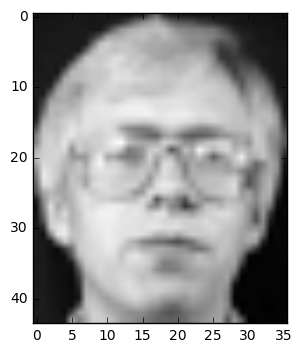

test : (42L, 1584L) (42L,)


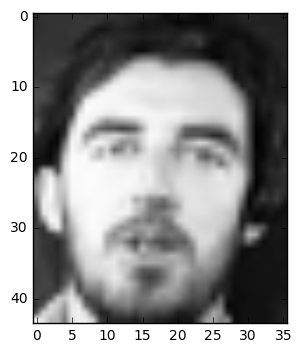

In [137]:
train_data, train_labels, test_data, test_labels = [], [], [],[]

for i in range(1,388) :
    file_name='Train/im_'+str(i)+".jpg"
    img = misc.imread(file_name)
    train_data.append(img.reshape(1584,))

    
for i in range(1,43) :
    file_name='Test/im_'+str(i)+".jpg"
    img = misc.imread(file_name, flatten=1)
    test_data.append(img.reshape(1584,))

    
train_data, train_labels = np.array(train_data, dtype=float),  np.array( pickle.load( open( "labelTrain.pckl", "rb" ) ) , dtype=int)
test_data, test_labels = np.array(test_data, dtype=float), np.array( pickle.load( open( "labelTest.pckl", "rb" ) ) , dtype=int)

print "trining :", train_data.shape, train_labels.shape
plt.imshow(train_data[10, :].reshape(44,36), cmap = cm.Greys_r)
plt.show()
plt.clf()

print "test :", test_data.shape, test_labels.shape
plt.imshow(test_data[10, :].reshape(44,36), cmap = cm.Greys_r)
plt.show()

In [119]:
test_data[0]

array([ 32.,  34.,  39., ...,  32.,  36.,  38.])

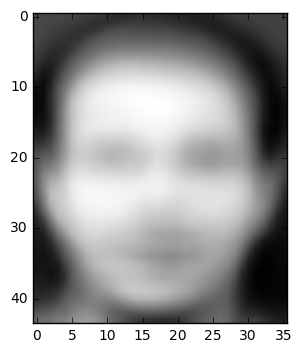

In [120]:
def get_mVec(data):
    s=np.sum(data, axis=0)
    mVec= s/len(data)
    return mVec

mVec=get_mVec(train_data)
plt.imshow(np.array(mVec).reshape(44,36), cmap = cm.Greys_r)
plt.show()

train_diff
(387L, 1584L)


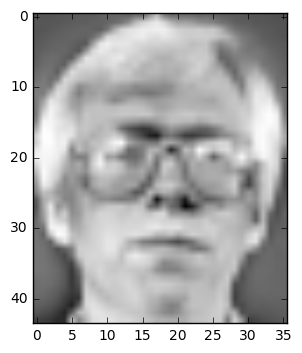

test_diff
(42L, 1584L)


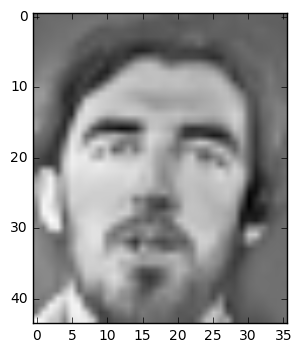

In [121]:
print "train_diff"
train_diff=np.subtract(train_data, mean)
print train_diff.shape
plt.imshow(train_diff[10, :].reshape(44,36), cmap = cm.Greys_r)
plt.show()

print "test_diff"
test_diff=np.subtract(test_data, mean)
print test_diff.shape
plt.imshow(test_diff[10, :].reshape(44,36), cmap = cm.Greys_r)
plt.show()

In [122]:
def facePCA(data):
    dataT_cov=np.cov(data.T)
    print data.shape
    print dataT_cov.shape
    eigenValues, eigenVectors =np.linalg.eig(dataT_cov)
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    pMat=eigenVectors.real
    mVec= get_mVec(data)
    return pMat, mVec

In [123]:
train_pMat, train_mVec= facePCA(train_data)

(387L, 1584L)
(1584L, 1584L)


primary components / eigenfaces :


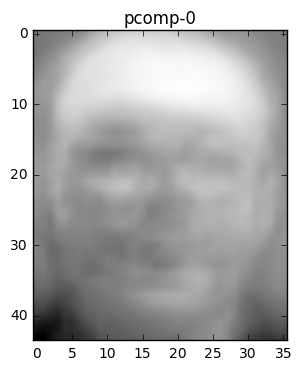

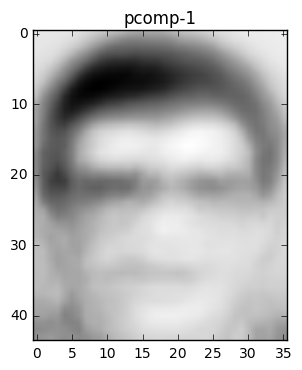

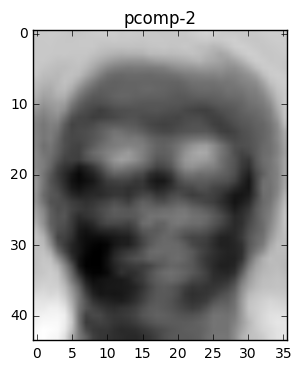

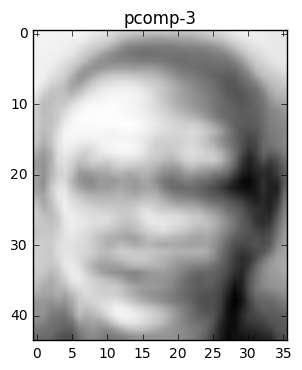

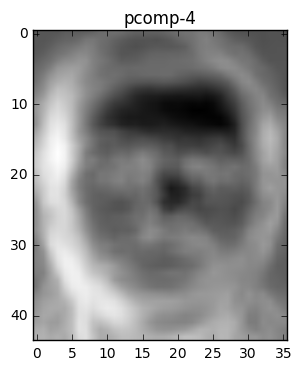

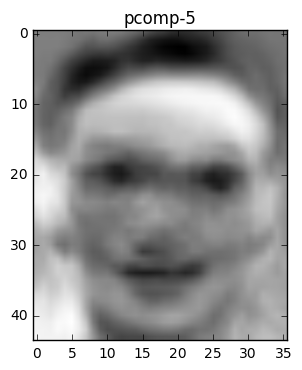

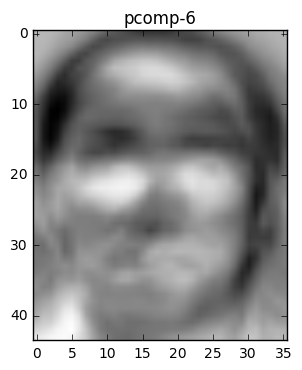

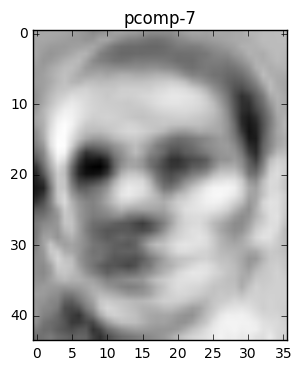

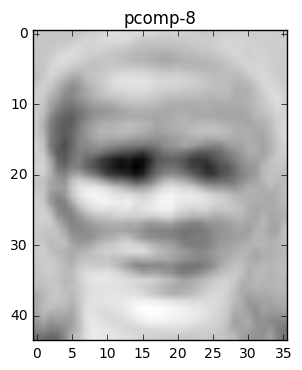

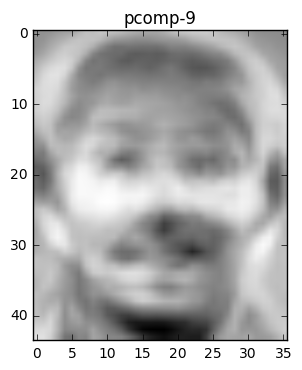

In [124]:
print "primary components / eigenfaces :"
for i in range(0,10):
    plt.imshow(train_pMat[:,i].reshape(44,36), cmap = cm.Greys_r)
    title="pcomp-"+str(i)
    plt.title(title) 
    plt.savefig(title)
    plt.show()

In [125]:
train_pMat[0,:].shape
train_pMat.shape
train_pMat

array([[ 0.00756102,  0.03727659,  0.03987454, ..., -0.00557001,
        -0.00557001, -0.01095604],
       [ 0.00778071,  0.03738149,  0.03976772, ...,  0.00208562,
         0.00208562, -0.00637235],
       [ 0.00830846,  0.03716309,  0.04051311, ..., -0.0148473 ,
        -0.0148473 ,  0.00784104],
       ..., 
       [-0.01072858,  0.00539454,  0.04883378, ..., -0.0034473 ,
        -0.0034473 , -0.00476287],
       [-0.00879292, -0.00015503,  0.05424758, ..., -0.00606813,
        -0.00606813,  0.01457918],
       [-0.00875174, -0.00268607,  0.05721274, ...,  0.00426618,
         0.00426618, -0.01377437]])

In [132]:
def projectPCA(img, mVec, pMat, k):
    img_diff=np.subtract(img, mVec)
    fVec=[]
    for i in range(0,k):
        basis= pMat[i]
        proj_component=np.inner(img_diff, basis)
        fVec.append(proj_component)
    return fVec
    
train_fVec0=projectPCA(train_data[0], train_mVec, train_pMat, 1000)

In [133]:
train_fVec0

[416.2431281625752,
 413.45489015639168,
 408.68750188640257,
 403.62321720349416,
 399.82198852762855,
 395.5927022385589,
 393.95326659918931,
 394.56613335035411,
 393.05035076165257,
 390.98815699616955,
 390.23175551570387,
 391.36449791065621,
 394.88839761074382,
 399.89874490929401,
 407.02546882621431,
 414.23061640328302,
 419.07878229915019,
 418.62145914191774,
 413.20201141750681,
 409.20230315400113,
 403.05335884384965,
 396.62671559788799,
 391.52908982589292,
 386.48860453271993,
 384.47112982465393,
 384.82870511273632,
 383.38549948054094,
 381.44492377489701,
 381.50359751606641,
 383.18055942938577,
 387.36601979322444,
 393.27683392083259,
 402.02393219321038,
 410.63545274497528,
 416.7080559678497,
 417.2606592835084,
 411.85994914046552,
 407.40278473599324,
 399.79697765651753,
 391.23154756621648,
 384.82562246341377,
 378.40701394208702,
 375.78007821753238,
 376.91191713070947,
 376.10895037900502,
 374.60246262749706,
 374.33189482322314,
 376.128268252572

In [134]:
def reconstructPCA(fVec, mVec, pMat):  
    rImg = mVec
    for i, u in enumerate(fVec):
        rImg= np.sum([rImg , pMat[i]], axis=0)
    return rImg

train_rec0=reconstructPCA(train_fVec0, train_mVec, train_mVec)

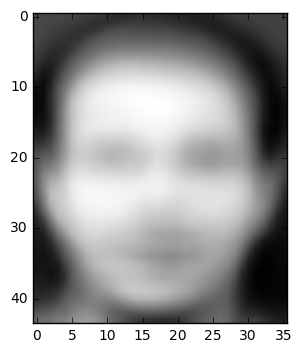

In [135]:
plt.imshow(train_rec0.reshape(44,36), cmap = cm.Greys_r)
plt.show()

4.6 

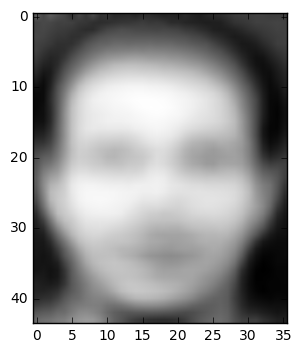

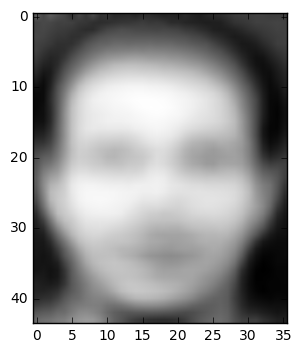

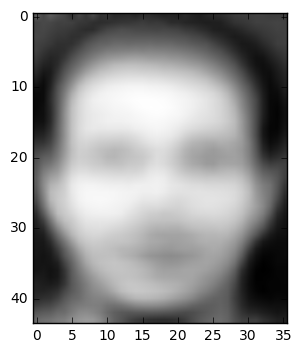

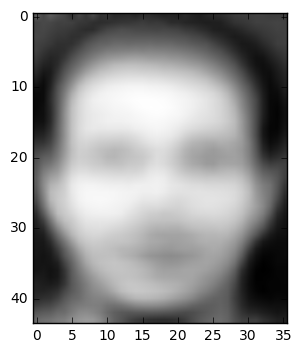

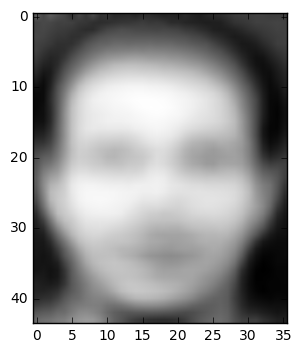

In [145]:
for i in range(0,5):
    train_fVec0 = projectPCA(test_data[10, i], mVec, train_pMat, 250)
    train_rec_=reconstructPCA(train_fVec0, train_mVec, train_pMat)
    plt.imshow(train_rec_.reshape(44,36), cmap = cm.Greys_r)
    plt.show()